In [1]:
import numpy as np
import pandas as pd

In [3]:
!unzip "drive/MyDrive/face-shape-classification.zip" -d "drive/MyDrive/face-shape-detector/"

Archive:  drive/MyDrive/face-shape-classification.zip
  inflating: drive/MyDrive/face-shape-detector/face shape detector/diamond/download (1).jpg  
  inflating: drive/MyDrive/face-shape-detector/face shape detector/diamond/download (10).jpg  
  inflating: drive/MyDrive/face-shape-detector/face shape detector/diamond/download (2).jpg  
  inflating: drive/MyDrive/face-shape-detector/face shape detector/diamond/download (3).jpg  
  inflating: drive/MyDrive/face-shape-detector/face shape detector/diamond/download (4).jpg  
  inflating: drive/MyDrive/face-shape-detector/face shape detector/diamond/download (5).jpg  
  inflating: drive/MyDrive/face-shape-detector/face shape detector/diamond/download (6).jpg  
  inflating: drive/MyDrive/face-shape-detector/face shape detector/diamond/download (7).jpg  
  inflating: drive/MyDrive/face-shape-detector/face shape detector/diamond/download.jpg  
  inflating: drive/MyDrive/face-shape-detector/face shape detector/diamond/face shape detector.jpg  
  

In [7]:
os.walk('drive/MyDrive/face-shape-detector/face shape detector')

<generator object _walk at 0x7b7c4fa54270>

In [8]:
import os

for dirname, _, filenames in os.walk('drive/MyDrive/face-shape-detector/face shape detector'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

drive/MyDrive/face-shape-detector/face shape detector/diamond/download (1).jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/download (10).jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/download (2).jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/download (3).jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/download (4).jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/download (5).jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/download (6).jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/download (7).jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/download.jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/face shape detector.jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/images (1).jpg
drive/MyDrive/face-shape-detector/face shape detector/diamond/images (2).jpg
drive/MyDrive/face-shape-detector/face shape detecto

In [9]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

In [10]:
train = ImageDataGenerator(rescale=1/255)

In [13]:
train_dataset = train.flow_from_directory('drive/MyDrive/face-shape-detector/face shape detector', target_size=(200, 200), batch_size=3, class_mode='binary')

Found 98 images belonging to 7 classes.


In [14]:
train_dataset.class_indices

{'diamond': 0,
 'heart': 1,
 'oblong': 2,
 'oval': 3,
 'round': 4,
 'square': 5,
 'triangle': 6}

In [30]:
classess = [ele for ele in train_dataset.class_indices]
classess

['diamond', 'heart', 'oblong', 'oval', 'round', 'square', 'triangle']

# Face Shape Finder using ANN

In [19]:
ann = models.Sequential([
    layers.Flatten(input_shape=(200, 200, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(7, activation='softmax')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(train_dataset, epochs=5)

Epoch 1/5
33/33 [==============================] - 7s 53ms/step - loss: 8.3273 - accuracy: 0.1735
Epoch 2/5
33/33 [==============================] - 2s 53ms/step - loss: 2.0809 - accuracy: 0.1837
Epoch 3/5
33/33 [==============================] - 2s 53ms/step - loss: 2.0377 - accuracy: 0.1531
Epoch 4/5
33/33 [==============================] - 2s 57ms/step - loss: 1.9447 - accuracy: 0.2245
Epoch 5/5
33/33 [==============================] - 2s 59ms/step - loss: 1.9786 - accuracy: 0.2041


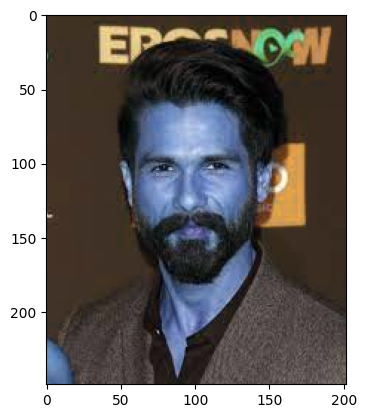

1/1 [==============================] - 0s 21ms/step
1
heart


In [31]:
img = cv2.imread('drive/MyDrive/face-shape-detector/face shape detector/diamond/download (3).jpg')
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = ann.predict(img)
print(np.argmax(classes))
z = (np.argmax(classes))
print(classess[z])

# Face Shape Identifier using CNN

In [32]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, padding='same', strides=2, kernel_size=3, activation='relu', input_shape=(200, 200, 3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(7,activation='softmax'))

In [33]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
cnn.fit(train_dataset,epochs=10)

Epoch 1/10
33/33 [==============================] - 8s 15ms/step - loss: 1.9654 - accuracy: 0.1633
Epoch 2/10
33/33 [==============================] - 0s 9ms/step - loss: 1.9535 - accuracy: 0.2041
Epoch 3/10
33/33 [==============================] - 0s 13ms/step - loss: 1.9334 - accuracy: 0.1633
Epoch 4/10
33/33 [==============================] - 0s 14ms/step - loss: 1.9257 - accuracy: 0.2347
Epoch 5/10
33/33 [==============================] - 0s 13ms/step - loss: 1.8950 - accuracy: 0.2041
Epoch 6/10
33/33 [==============================] - 1s 15ms/step - loss: 1.8415 - accuracy: 0.2653
Epoch 7/10
33/33 [==============================] - 0s 13ms/step - loss: 1.7779 - accuracy: 0.2653
Epoch 8/10
33/33 [==============================] - 1s 16ms/step - loss: 1.6977 - accuracy: 0.3878
Epoch 9/10
33/33 [==============================] - 0s 10ms/step - loss: 1.4612 - accuracy: 0.4286
Epoch 10/10
33/33 [==============================] - 0s 10ms/step - loss: 1.2905 - accuracy: 0.5102


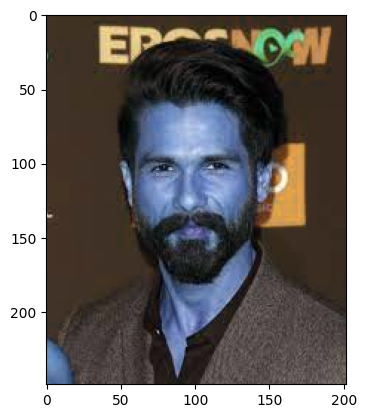

1/1 [==============================] - 0s 23ms/step
0
diamond


In [38]:
img = cv2.imread("drive/MyDrive/face-shape-detector/face shape detector/diamond/download (3).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(np.argmax(classes))
print(classess[np.argmax(classes)])

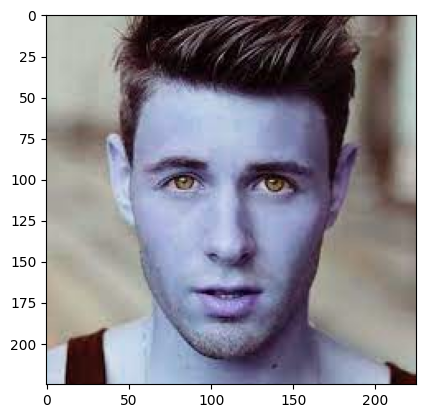

1/1 [==============================] - 0s 63ms/step
3
oval


In [39]:
img = cv2.imread("drive/MyDrive/face-shape-detector/face shape detector/oval/download (1).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(np.argmax(classes))
print(classess[np.argmax(classes)])

In [40]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [41]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int32)

<Axes: ylabel='count'>

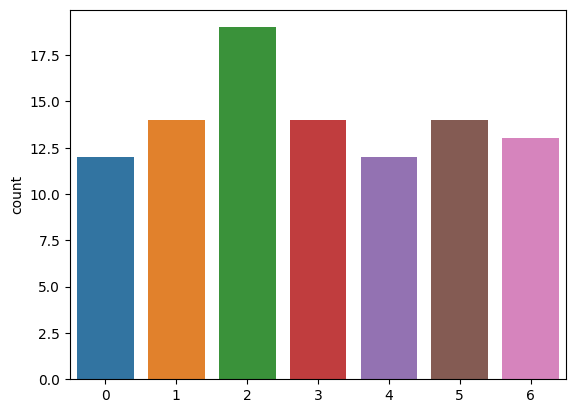

In [43]:
sns.countplot(x=train_dataset.classes)

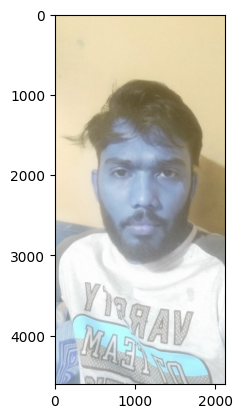

1/1 [==============================] - 0s 19ms/step
1
heart


In [44]:
img = cv2.imread("drive/MyDrive/face-shape-identifier/test/IMG20211016222032.jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(np.argmax(classes))
print(classess[np.argmax(classes)])

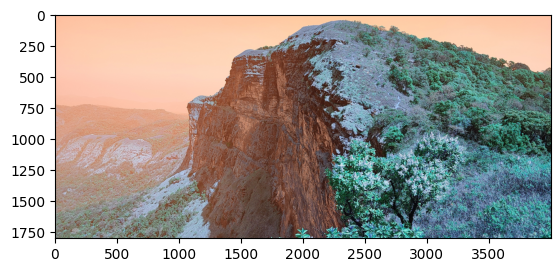

1/1 [==============================] - 0s 23ms/step
1
heart


In [45]:
img = cv2.imread("drive/MyDrive/face-shape-identifier/test/IMG_20220221_105433.jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(np.argmax(classes))
print(classess[np.argmax(classes)])

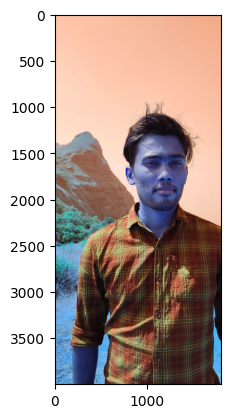

1/1 [==============================] - 0s 29ms/step
5
square


In [46]:
img = cv2.imread("drive/MyDrive/face-shape-identifier/test/IMG_20220221_105540.jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(np.argmax(classes))
print(classess[np.argmax(classes)])